In [2]:
#importing the required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
#importing data
data=pd.read_csv('House_prediction.csv')

In [4]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [6]:
data.notnull().sum()
#here we concluded that there is no missing value in our dataset

city                   10692
area                   10692
rooms                  10692
bathroom               10692
parking spaces         10692
floor                  10692
animal                 10692
furniture              10692
hoa (R$)               10692
rent amount (R$)       10692
property tax (R$)      10692
fire insurance (R$)    10692
total (R$)             10692
dtype: int64

In [7]:
data['city'].value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

In [8]:
data['animal'].value_counts()

acept        8316
not acept    2376
Name: animal, dtype: int64

In [9]:
data['furniture'].value_counts()

not furnished    8086
furnished        2606
Name: furniture, dtype: int64

In [10]:
#using pandas for one hot encoding
data1 = pd.get_dummies(data.city)
data1

,Belo Horizonte,Campinas,Porto Alegre,Rio de Janeiro,São Paulo
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10687,0,0,1,0,0
10688,0,0,0,0,1
10689,0,0,0,1,0
10690,0,0,0,1,0


In [11]:
data = pd.concat([data1,data],axis='columns')
data

,Belo Horizonte,Campinas,Porto Alegre,Rio de Janeiro,São Paulo,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,0,0,0,0,1,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,0,0,0,0,1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,0,0,1,0,0,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,0,0,1,0,0,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,0,0,0,0,1,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,0,0,1,0,0,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,0,0,0,0,1,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,0,0,0,1,0,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,0,0,0,1,0,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [12]:
data.drop('city',axis=1,inplace=True)

In [13]:
X1 = data.iloc[:,:10]
X1

,Belo Horizonte,Campinas,Porto Alegre,Rio de Janeiro,São Paulo,area,rooms,bathroom,parking spaces,floor
0,0,0,0,0,1,70,2,1,1,7
1,0,0,0,0,1,320,4,4,0,20
2,0,0,1,0,0,80,1,1,1,6
3,0,0,1,0,0,51,2,1,0,2
4,0,0,0,0,1,25,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
10687,0,0,1,0,0,63,2,1,1,5
10688,0,0,0,0,1,285,4,4,4,17
10689,0,0,0,1,0,70,3,3,0,8
10690,0,0,0,1,0,120,2,2,2,8


In [14]:
#replacing values with - to zero
data['floor'].replace(['-','0'],inplace=True)  

In [15]:
#calculating total sum so that we can see how average of each quantity behave with our cities
data["floor"] = data["floor"].astype(str).astype(int)
area1,rooms1,bath1,parking1,floor1=0,0,0,0,0
area2,rooms2,bath2,parking2,floor2=0,0,0,0,0
area3,rooms3,bath3,parking3,floor3=0,0,0,0,0
area4,rooms4,bath4,parking4,floor4=0,0,0,0,0
area5,rooms5,bath5,parking5,floor5=0,0,0,0,0
for i in range(0,10692):
    if(data.iloc[i,0]==1):
        area1=area1+data.iloc[i,5]
        rooms1=rooms1+data.iloc[i,6]
        bath1=bath1+data.iloc[i,7]
        parking1=parking1+data.iloc[i,8]
        floor1=floor1+data.iloc[i,9]
    elif(data.iloc[i,1]==1):
        area2=area2+data.iloc[i,5]
        rooms2=rooms2+data.iloc[i,6]
        bath2=bath2+data.iloc[i,7]
        parking2=parking2+data.iloc[i,8]
        floor2=floor2+data.iloc[i,9]
    elif(data.iloc[i,2]==1):
        area3=area3+data.iloc[i,5]
        rooms3=rooms3+data.iloc[i,6]
        bath3=bath3+data.iloc[i,7]
        parking3=parking3+data.iloc[i,8]
        floor3=floor3+data.iloc[i,9]
    elif(data.iloc[i,3]==1):
        area4=area4+data.iloc[i,5]
        rooms4=rooms4+data.iloc[i,6]
        bath4=bath4+data.iloc[i,7]
        parking4=parking4+data.iloc[i,8]
        floor4=floor4+data.iloc[i,9]
    elif(data.iloc[i,4]==1):
        area5=area5+data.iloc[i,5]
        rooms5=rooms5+data.iloc[i,6]
        bath5=bath5+data.iloc[i,7]
        parking5=parking5+data.iloc[i,8]
        floor5=floor5+data.iloc[i,9]    
no5=5887
no4=1501
no1=1258
no3=1193
no2=853   

([<matplotlib.axis.XTick at 0x205f8257048>,
 <a list of 5 Text xticklabel objects>)

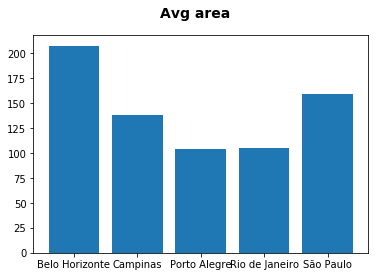

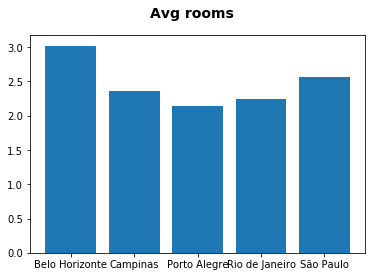

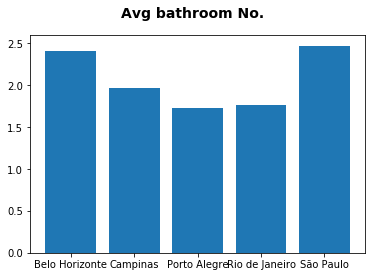

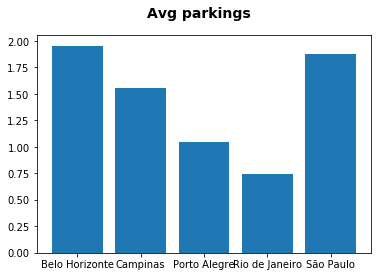

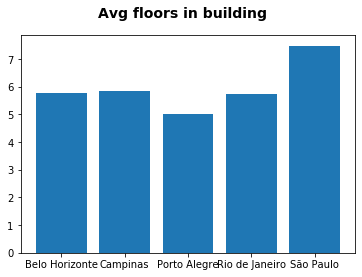

In [16]:
x_axis=['Belo Horizonte','Campinas','Porto Alegre','Rio de Janeiro','São Paulo']
y_axis=[area1/no1,area2/no2,area3/no3,area4/no4,area5/no5]
fig = plt.figure()
fig.suptitle('Avg area', fontsize=14, fontweight='bold')
ind = np.arange(len(x_axis))
plt.bar(ind,y_axis)
plt.xticks(ind,x_axis)
x_axis=['Belo Horizonte','Campinas','Porto Alegre','Rio de Janeiro','São Paulo']
y_axis=[rooms1/no1,rooms2/no2,rooms3/no3,rooms4/no4,rooms5/no5]
fig = plt.figure()
fig.suptitle('Avg rooms', fontsize=14, fontweight='bold')
ind = np.arange(len(x_axis))
plt.bar(ind,y_axis)
plt.xticks(ind,x_axis)
x_axis=['Belo Horizonte','Campinas','Porto Alegre','Rio de Janeiro','São Paulo']
y_axis=[bath1/no1,bath2/no2,bath3/no3,bath4/no4,bath5/no5]
fig = plt.figure()
fig.suptitle('Avg bathroom No.', fontsize=14, fontweight='bold')
ind = np.arange(len(x_axis))
plt.bar(ind,y_axis)
plt.xticks(ind,x_axis)
x_axis=['Belo Horizonte','Campinas','Porto Alegre','Rio de Janeiro','São Paulo']
y_axis=[parking1/no1,parking2/no2,parking3/no3,parking4/no4,parking5/no5]
fig = plt.figure()
fig.suptitle('Avg parkings', fontsize=14, fontweight='bold')
ind = np.arange(len(x_axis))
plt.bar(ind,y_axis)
plt.xticks(ind,x_axis)
x_axis=['Belo Horizonte','Campinas','Porto Alegre','Rio de Janeiro','São Paulo']
y_axis=[floor1/no1,floor2/no2,floor3/no3,floor4/no4,floor5/no5]
fig = plt.figure()
fig.suptitle('Avg floors in building', fontsize=14, fontweight='bold')
ind = np.arange(len(x_axis))
plt.bar(ind,y_axis)
plt.xticks(ind,x_axis)

In [17]:
#dropping out one city because it will cause error while training 
data.drop('Belo Horizonte',axis=1,inplace=True)

In [18]:
data

,Campinas,Porto Alegre,Rio de Janeiro,São Paulo,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,0,0,0,1,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,0,0,0,1,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,0,1,0,0,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,0,1,0,0,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,0,0,0,1,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,0,1,0,0,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,0,0,0,1,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,0,0,1,0,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,0,0,1,0,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [19]:
#changing values to 1 and 0 in animal and furniture columns
from sklearn.preprocessing import LabelEncoder
label_encoder =  LabelEncoder()

In [20]:
data['animal']= label_encoder.fit_transform(data['animal'])
data['furniture']= label_encoder.fit_transform(data['furniture'])

In [21]:
data

,Campinas,Porto Alegre,Rio de Janeiro,São Paulo,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,0,0,0,1,70,2,1,1,7,0,0,2065,3300,211,42,5618
1,0,0,0,1,320,4,4,0,20,0,1,1200,4960,1750,63,7973
2,0,1,0,0,80,1,1,1,6,0,1,1000,2800,0,41,3841
3,0,1,0,0,51,2,1,0,2,0,1,270,1112,22,17,1421
4,0,0,0,1,25,1,1,0,1,1,1,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,0,1,0,0,63,2,1,1,5,1,0,402,1478,24,22,1926
10688,0,0,0,1,285,4,4,4,17,0,1,3100,15000,973,191,19260
10689,0,0,1,0,70,3,3,0,8,1,0,980,6000,332,78,7390
10690,0,0,1,0,120,2,2,2,8,0,0,1585,12000,279,155,14020


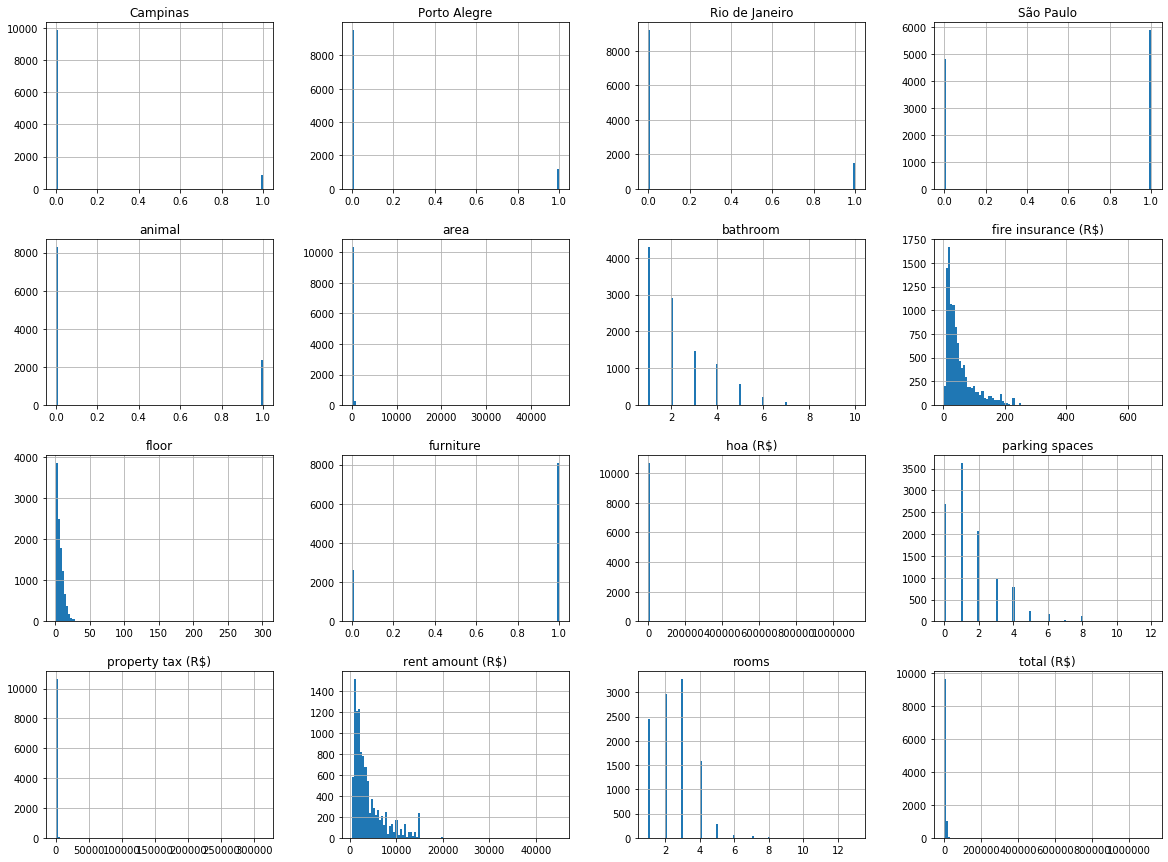

In [22]:
data.hist(bins=100,figsize=(20,15))
plt.show()

In [23]:
#checking correlation of each value with rent amount
corr_matrix=data.corr()
corr_matrix["rent amount (R$)"].sort_values(ascending=False)

rent amount (R$)       1.000000
fire insurance (R$)    0.987343
bathroom               0.668504
parking spaces         0.578361
rooms                  0.541758
total (R$)             0.264490
São Paulo              0.245690
area                   0.180742
floor                  0.135677
property tax (R$)      0.107884
hoa (R$)               0.036490
animal                -0.067754
Rio de Janeiro        -0.078650
Campinas              -0.132342
Porto Alegre          -0.162051
furniture             -0.164235
Name: rent amount (R$), dtype: float64

In [24]:
sns.set(rc={'figure.figsize':(15,15)})

In [25]:
#sns.scatterplot(x=data["area"]*(data["bathroom"]+data["floor"]),y=data["rent amount (R$)"],hue=data["animal"])
#plt.xlim(0, 200)
#plt.ylim(0, 15000)

In [26]:
#new feature
#data["totalvalue"]=(data["parking spaces"]+1)*(data['area']+data["rooms"]+data["bathroom"]+data["floor"])
#data["totalvalue"]=(data["area"])/(data["parking spaces"]+1)
#data

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X =data.iloc[:,:11]
X

,Campinas,Porto Alegre,Rio de Janeiro,São Paulo,area,rooms,bathroom,parking spaces,floor,animal,furniture
0,0,0,0,1,70,2,1,1,7,0,0
1,0,0,0,1,320,4,4,0,20,0,1
2,0,1,0,0,80,1,1,1,6,0,1
3,0,1,0,0,51,2,1,0,2,0,1
4,0,0,0,1,25,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10687,0,1,0,0,63,2,1,1,5,1,0
10688,0,0,0,1,285,4,4,4,17,0,1
10689,0,0,1,0,70,3,3,0,8,1,0
10690,0,0,1,0,120,2,2,2,8,0,0


In [28]:
y = data.iloc[:,[12]]
y

,rent amount (R$)
0,3300
1,4960
2,2800
3,1112
4,800
...,...
10687,1478
10688,15000
10689,6000
10690,12000


In [29]:
bestfeatures = SelectKBest(score_func=chi2,k=10)
fit = bestfeatures.fit(X,y)

In [31]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [33]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [34]:
featureScores

,Specs,Score
0,Campinas,1.598295e+03
1,Porto Alegre,1.544062e+03
2,Rio de Janeiro,1.116584e+03
3,São Paulo,1.051052e+03
4,area,3.021956e+06
5,rooms,2.540001e+03
6,bathroom,5.389520e+03
7,parking spaces,7.573052e+03
8,floor,8.144282e+03
9,animal,1.159197e+03


In [35]:
print(featureScores.nlargest(10,'Score'))

            Specs         Score
4            area  3.021956e+06
8           floor  8.144282e+03
7  parking spaces  7.573052e+03
6        bathroom  5.389520e+03
5           rooms  2.540001e+03
0        Campinas  1.598295e+03
1    Porto Alegre  1.544062e+03
9          animal  1.159197e+03
2  Rio de Janeiro  1.116584e+03
3       São Paulo  1.051052e+03


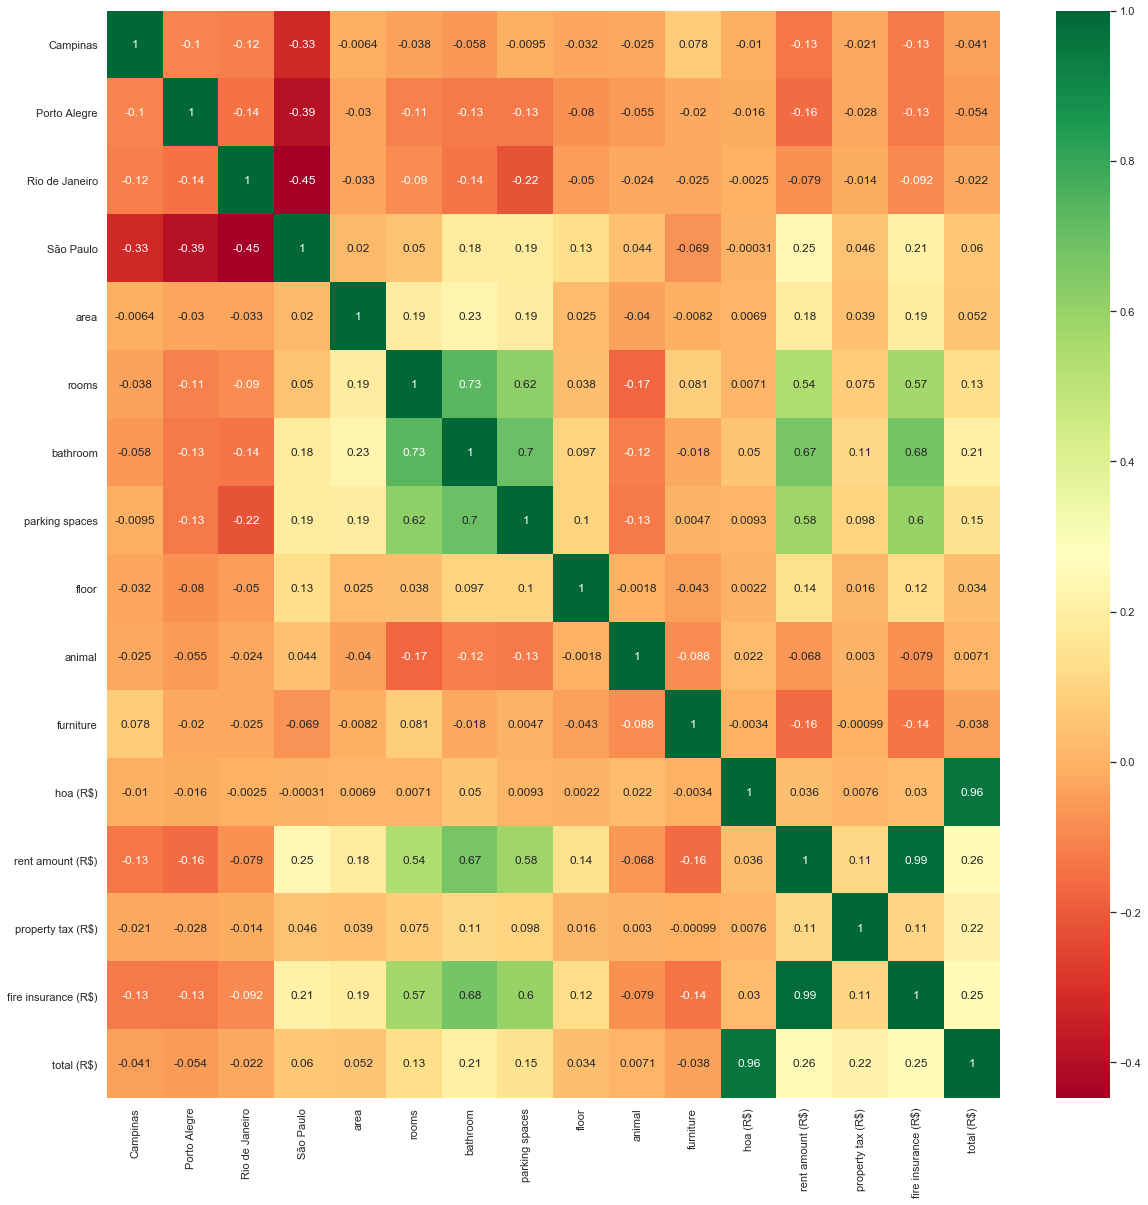

In [37]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [38]:
#from here we see that main features are rooms bathroom parking space for deciding rent amount so we will take that


In [45]:
X =data.iloc[:,4:9]
X

,area,rooms,bathroom,parking spaces,floor
0,70,2,1,1,7
1,320,4,4,0,20
2,80,1,1,1,6
3,51,2,1,0,2
4,25,1,1,0,1
...,...,...,...,...,...
10687,63,2,1,1,5
10688,285,4,4,4,17
10689,70,3,3,0,8
10690,120,2,2,2,8


In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [52]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
y_pred = regression.predict(X_test)

In [54]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [55]:
score

0.512191732803684